In [14]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [15]:
# ===============================
# 1. Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [16]:
# ===============================
# 2. Load Dataset
# ===============================
df = pd.read_csv(r"C:\Users\Jyoti Rai\Downloads\archive\WA_Fn-UseC_-Telco-Customer-Churn.csv")  
print(df.head())
print(df.info())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [17]:
# ===============================
# 3. Data Preprocessing
# ===============================

# Convert TotalCharges to numeric (some blanks exist in dataset)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle missing values
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Encode target column
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print(df.head())


   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5375       0              0        1           0       1   
1        3962       1              0        0           0      34   
2        2564       1              0        0           0       2   
3        5535       1              0        0           0      45   
4        6511       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   


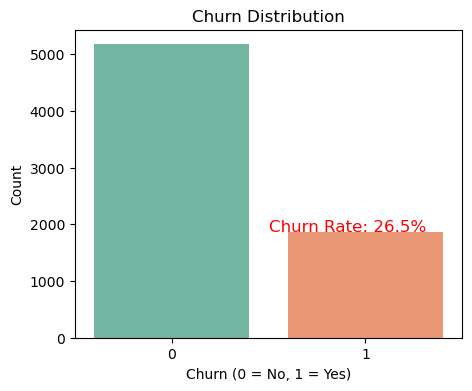

In [24]:
import matplotlib.ticker as mtick

# 1. Target Variable Distribution (Churn vs Non-Churn)
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
churn_rate = df['Churn'].mean() * 100
plt.text(0.5, df['Churn'].value_counts().min(), f"Churn Rate: {churn_rate:.1f}%", fontsize=12, color="red")
plt.show()

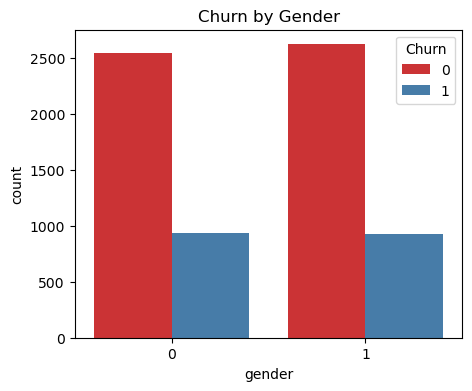

In [25]:
# 2. Churn by Gender
plt.figure(figsize=(5,4))
sns.countplot(x='gender', hue='Churn', data=df, palette='Set1')
plt.title("Churn by Gender")
plt.show()


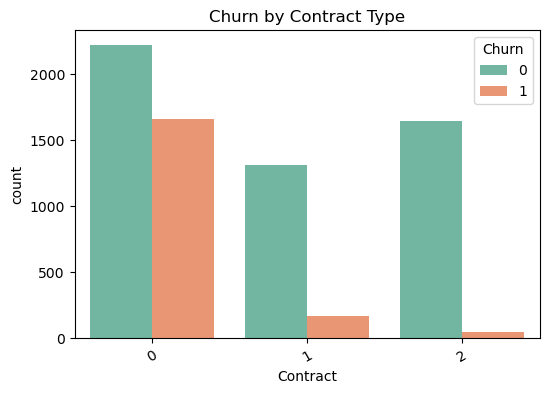

In [26]:
# 3. Churn by Contract Type
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title("Churn by Contract Type")
plt.xticks(rotation=30)
plt.show()

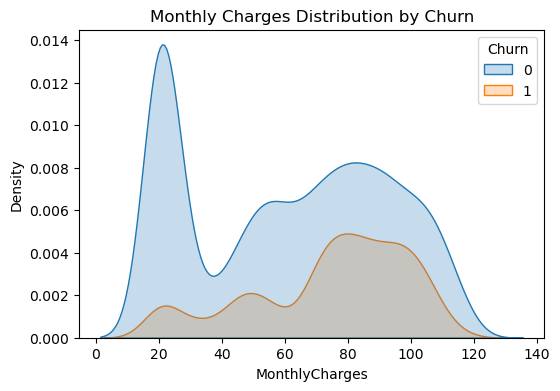

In [27]:
# 4. Monthly Charges vs Churn
plt.figure(figsize=(6,4))
sns.kdeplot(x='MonthlyCharges', hue='Churn', data=df, fill=True)
plt.title("Monthly Charges Distribution by Churn")
plt.show()

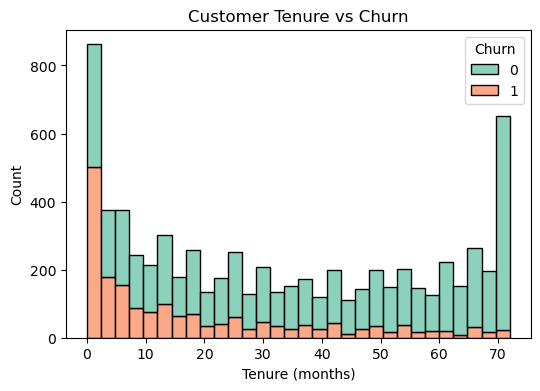

In [28]:
# 5. Tenure vs Churn
plt.figure(figsize=(6,4))
sns.histplot(x='tenure', hue='Churn', data=df, multiple="stack", bins=30, palette='Set2')
plt.title("Customer Tenure vs Churn")
plt.xlabel("Tenure (months)")
plt.show()


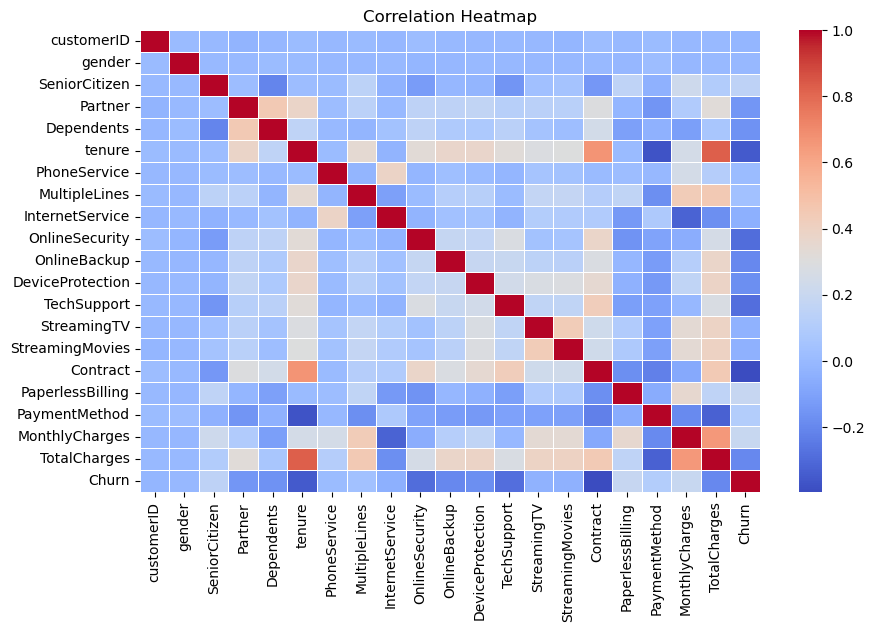

In [29]:
# 6. Correlation Heatmap
plt.figure(figsize=(10,6))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [18]:
# ===============================
# 4. Feature & Target Split
# ===============================
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [19]:
# ===============================
# 5. Feature Scaling
# ===============================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
# ===============================
# 6. Model Building
# ===============================

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:,1]))
print(classification_report(y_test, y_pred_log))


# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))
print(classification_report(y_test, y_pred_rf))


# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\n--- XGBoost ---")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]))
print(classification_report(y_test, y_pred_xgb))


--- Logistic Regression ---
Accuracy: 0.8161816891412349
ROC-AUC: 0.8617802022627761
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409


--- Random Forest ---
Accuracy: 0.8019872249822569
ROC-AUC: 0.8458199198815819
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.66      0.51      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409


--- XGBoost ---
Accuracy: 0.7842441447835344
ROC-AUC: 0.8343675924104879
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      10

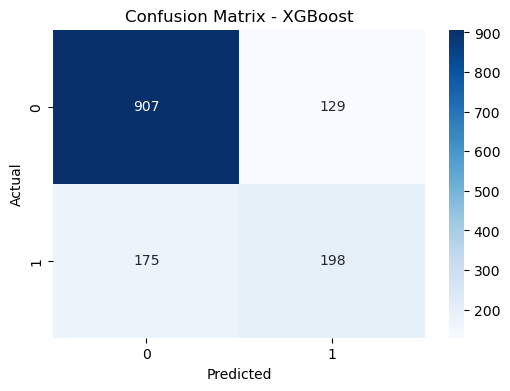

In [21]:
# ===============================
# 7. Confusion Matrix
# ===============================
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

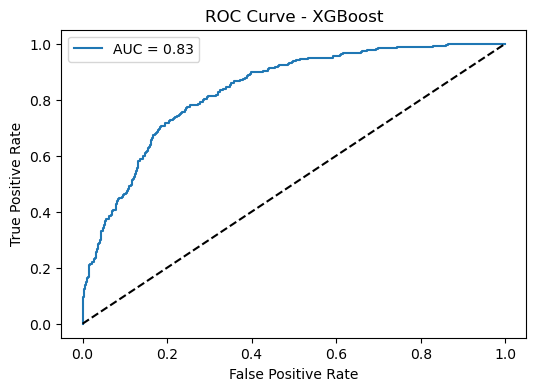

In [22]:
# ===============================
# 8. ROC Curve
# ===============================
y_probs = xgb_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()

In [31]:
## Observation :
## “From the EDA, we observed that churn is significantly higher among month-to-month customers
## Those with higher monthly charges.
## Customers with longer tenure are much less likely to churn.
## These insights can help businesses design retention strategies.”


## Finished ##